jqdatasdk not installed
you are using non-interactive mdoel quantaxis
datetime    code  
2016-03-31  000568     5.485000
            000596     6.673000
            000799     1.584000
            000858     6.279000
            000860     3.145000
                        ...    
2022-12-31  600809    37.972000
            603198    24.610001
            603369    22.620001
            603589    17.409000
            603919     8.897000
Name: factor, Length: 560, dtype: float64
Quantiles Statistics


/home/work_space/QUANTAXIS_Learning/QUANTAXIS/QAFactor/plotting.py:184: FutureWarning: ['group', 'start_date'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  quantile_stats = factor_data.groupby(grouper).agg(


,min,max,mean,std,count,count %
factor_quantile,,,,,,
1,-0.936,14.991000,6.321813,3.324416,80,23.460411
2,0.868,17.212999,9.122079,4.244487,63,18.475073
3,3.352,21.825001,11.715312,4.777091,61,17.888563
4,4.678,23.597000,13.717397,5.248091,63,18.475073
5,6.874,28.372000,15.942068,5.924944,74,21.700880


Returns Analysis


/home/work_space/QUANTAXIS_Learning/QUANTAXIS/QAFactor/plotting.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  returns_table = returns_table.append(alpha_beta)


,period_1q
Ann. alpha,0.060
beta,-0.207
Mean Period Wise Return Top Quantile (bps),-300.963
Mean Period Wise Return Bottom Quantile (bps),-185.642
Mean Period Wise Spread (bps),-115.321


Information Analysis


,period_1q
IC Mean,0.076
IC std.,0.394
Risk-Adjusted IC (IR),0.194
t-stat (IC),0.988
p-value (IC),0.333
IC Skew,0.138
IC Kurtosis,-1.199


Turnover Analysis


/home/work_space/QUANTAXIS_Learning/QUANTAXIS/QAFactor/plotting.py:220: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for quantile, p_data in quantile_turnover[period].iteritems():
/home/work_space/QUANTAXIS_Learning/QUANTAXIS/QAFactor/plotting.py:225: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for period, p_data in autocorrelation_data.iteritems():


,1
Quantile 1 Mean Turnover,0.537
Quantile 2 Mean Turnover,0.580
Quantile 3 Mean Turnover,0.660
Quantile 4 Mean Turnover,0.653
Quantile 5 Mean Turnover,0.530


,1
Mean Factor Rank Autocorrelation,0.79


<Figure size 640x480 with 0 Axes>

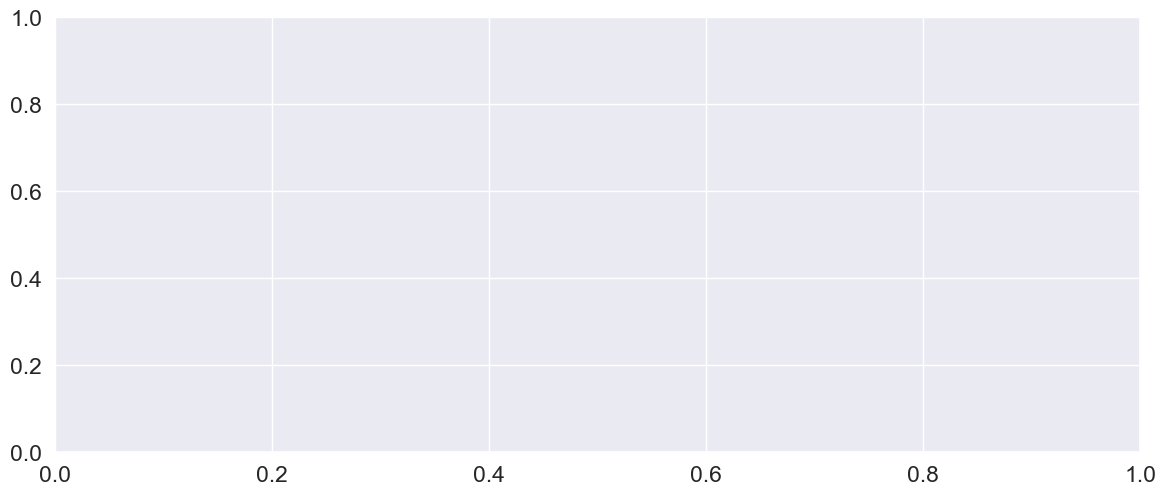

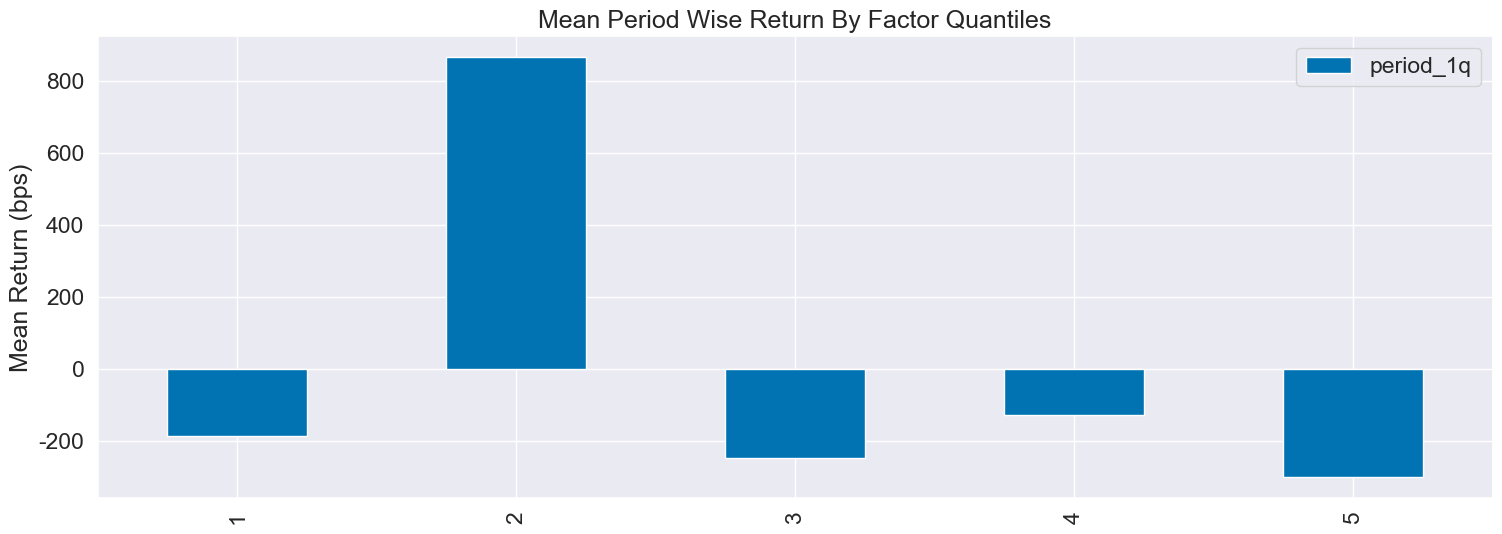

                      code report_date     EPS  deductEPS  \
report_date code                                            
2016-03-31  000568  000568  2016-03-31  0.4238   0.421105   
2016-06-30  000568  000568  2016-06-30  0.7933   0.789900   
2016-09-30  000568  000568  2016-09-30  1.0740   1.076000   
2016-12-31  000568  000568  2016-12-31  1.3750   1.380000   
2017-03-31  000568  000568  2017-03-31  0.5690   0.567518   
...                    ...         ...     ...        ...   
2021-12-31  603919  603919  2021-12-31  0.6400   0.640000   
2022-03-31  603919  603919  2022-03-31  0.3200   0.321346   
2022-06-30  603919  603919  2022-06-30  0.4200   0.410000   
2022-09-30  603919  603919  2022-09-30  0.4210   0.425547   
2022-12-31  603919  603919  2022-12-31  0.5500   0.530000   

                    undistributedProfitPerShare  netAssetsPerShare  \
report_date code                                                     
2016-03-31  000568                       5.1258             7.7259

In [1]:
# import jqdatasdk
import pandas as pd
import QUANTAXIS as QA

import QUANTAXIS.QAFactor.analyze as analyze
import QUANTAXIS.QAFactor.data as data
import QUANTAXIS.QAFactor.preprocess as preprocess
import QUANTAXIS.QAFactor.tears as tears
import QUANTAXIS.QAFactor.utils as utils



# print('此测试文件需要配合jqdata使用, 详情请参考 QA_JQDATA')
# JQ_USERNAME = input('JQDATA_USERNAME: ')
# JQ_PASSWORD = input('JQDATA_PASSWORD: ')
# jqdatasdk.auth(JQ_USERNAME, JQ_PASSWORD)

code_list = QA.QA_fetch_stock_block_adv().get_block(
    "白酒").index.get_level_values("code").tolist()
# code_list = QA.QA_fetch_stock_block_adv(
# ).get_block("中证200").index.get_level_values("code").tolist()
df_finance = QA.QA_fetch_financial_report_adv(
    code=code_list,
    start='2016-01-01',
    # end='2018-12-31'
    # start='2018-01-01',
    end='2022-12-31'
).data

if len(df_finance) ==0:
    print('请先存储QUANTAXIS 财务数据 ==> 输入quantaxis进入cli后 输入save financialfiles')
else:
    factor = df_finance['ROE']

    # 因子格式化
    factor = preprocess.QA_fmt_factor(factor)

    # 上市日期过滤
    factor_data = preprocess.QA_fetch_factor_start_date(factor)
    factor_data = factor_data.reset_index()
    factor_data = factor_data.loc[(factor_data.datetime - pd.to_datetime(factor_data.start_date, utc=False)
                                ) > pd.Timedelta("200D")].set_index(
                                    ["datetime",
                                    "code"]
                                )
    factor = factor_data['factor']
    print(factor)

    # 极值处理，默认使用 "MAD"
    factor = preprocess.QA_winsorize_factor(factor)
    factor_time_range = factor.index.remove_unused_levels(
    ).get_level_values("datetime").tolist()
    # 数据导入
    dataapi = data.DataApi(
        # jq_username=JQ_USERNAME,
        # jq_password=JQ_PASSWORD,
        factor_time_range=factor_time_range,
        industry_cls="sw_l1",
        weight_cls="mktcap",
        detailed=True,
        frequence='1q'
    )
    analyzer = analyze.FactorAnalyzer(
        factor=factor,
        **dataapi.apis,
        periods=1,
        max_loss=0.9
    )

    # 因子数据
    factor_data = analyzer.clean_factor_data.head()

    # 简略分析
    tears.create_summary_tear_sheet(factor_data=analyzer.clean_factor_data)
import QUANTAXIS as QA

code_list = QA.QA_fetch_stock_block_adv().get_block(
    "白酒").index.get_level_values("code").tolist()

df_finance = QA.QA_fetch_financial_report_adv(
    code=code_list,
    start='2016-01-01',
    # end='2018-12-31'
    # start='2018-01-01',
    end='2022-12-31'
).data

print(df_finance)

In [7]:
# import jqdatasdk
import pandas as pd
import QUANTAXIS as QA

import QUANTAXIS.QAFactor.analyze as analyze
import QUANTAXIS.QAFactor.data as data
import QUANTAXIS.QAFactor.preprocess as preprocess
import QUANTAXIS.QAFactor.tears as tears
import QUANTAXIS.QAFactor.utils as utils



# print('此测试文件需要配合jqdata使用, 详情请参考 QA_JQDATA')
# JQ_USERNAME = input('JQDATA_USERNAME: ')
# JQ_PASSWORD = input('JQDATA_PASSWORD: ')
# jqdatasdk.auth(JQ_USERNAME, JQ_PASSWORD)

code_list = QA.QA_fetch_stock_block_adv().get_block(
    "白酒").index.get_level_values("code").tolist()
code_list = ['600519']
# code_list = QA.QA_fetch_stock_block_adv(
# ).get_block("中证200").index.get_level_values("code").tolist()
df_finance = QA.QA_fetch_financial_report_adv(
    code=code_list,
    start='2016-01-01',
    # end='2018-12-31'
    # start='2018-01-01',
    end='2023-12-31'
).data
print(df_finance.columns)


Index(['code', 'report_date', 'EPS', 'deductEPS',
       'undistributedProfitPerShare', 'netAssetsPerShare',
       'capitalReservePerShare', 'ROE', 'operatingCashFlowPerShare',
       'moneyFunds',
       ...
       'Net increase in funds from repo business',
       'Net increase in loans and advances to customers',
       'Net increase in deposits with central banks and interbank',
       'Cash paid for claims on original insurance contracts',
       'Cash paid for interest, fees and commissions',
       'Cash paid for policy dividends',
       'cash received from minority shareholders investment in subsidiaries',
       'Dividends and profits paid by subsidiaries to minority shareholders',
       'Depreciation and amortization of investment properties',
       'Credit impairment loss'],
      dtype='object', length=582)
